### import/open the WordBank.xlsx


In [4]:
import pandas as pd
import numpy as np 

world_bank = pd.read_excel("./Data/WorldBank.xlsx")

# rename country name column to country
world_bank = world_bank.rename({"Country Name": "Country"}, axis= 1)

world_bank.head()


,Country,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735


### create a column "Population (M)", by dividing GDP by GDP Per Capita, then dividing that by one million.

In [5]:
world_bank["Population (M)"] = (world_bank["GDP (USD)"]/ world_bank["GDP per capita (USD)"] / 1_000_000)

world_bank.head()

,Country,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542,37.172416
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856


### Perform basic data profiling and QA on the data. Take note of any missing values, double check data types, and modify column names as appropriate

In [6]:
world_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country                                                       12449 non-null  object 
 1   Country Code                                                  12449 non-null  object 
 2   Region                                                        12449 non-null  object 
 3   IncomeGroup                                                   12449 non-null  object 
 4   Year                                                          12449 non-null  int64  
 5   Birth rate, crude (per 1,000 people)                          11440 non-null  float64
 6   Death rate, crude (per 1,000 people)                          11416 non-null  float64
 7   Electric power consumption (kWh per capita)                   5848 

In [7]:
# the data types are correct. 

### Pulling hdi data

In [8]:
# Flow:
# Filter the data to 2014, and join hdi.csv to it on country code("iso3').
# We are only interested in 2014 as it includes more insights and data available.(other years has a lot of missing) 
# The only column from hdi.csv we should join is 'hdi_2014'. 
# Save in the seperate table from the original Word Bank data, called wb_hdi_2014

hdi = pd.read_csv("./Data/HDI.csv")

hdi.head()


,iso3,country,hdicode,region,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,...,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,26.0,0.728,0.739,0.742,0.748,0.755,...,49.56,49.68,55.49,59.76,64.95,75.61,65.97,68.95,68.95,68.95


In [9]:
wb_hdi_2014 = world_bank.query("Year == 2014").merge(hdi[['iso3', 'hdi_2014']], how='left', left_on='Country Code', right_on="iso3")

wb_hdi_2014.head()

,Country,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M),iso3,hdi_2014
0,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.0,55.1,62.966,51.1148,1.735,33.370856,AFG,0.479
1,Albania,ALB,Europe & Central Asia,Upper middle income,2014,12.259,7.219,2309.37,1.322820e+10,4578.670,60.1,8.9,77.813,105.4420,17.490,2.889092,ALB,0.792
2,Algeria,DZA,Middle East & North Africa,Upper middle income,2014,25.538,4.709,1362.87,2.140000e+11,5493.060,29.5,21.8,75.878,16.3425,10.207,38.958249,DZA,0.735
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,2014,17.500,4.200,NaN,6.430000e+08,11525.200,NaN,NaN,NaN,278.9550,NaN,0.055791,NaN,NaN
4,Andorra,AND,Europe & Central Asia,High income: nonOECD,2014,NaN,NaN,NaN,3.350740e+09,42300.300,95.9,3.2,NaN,168.5380,NaN,0.079213,AND,0.871


In [10]:
wb_hdi_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 18 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country                                                       211 non-null    object 
 1   Country Code                                                  211 non-null    object 
 2   Region                                                        211 non-null    object 
 3   IncomeGroup                                                   211 non-null    object 
 4   Year                                                          211 non-null    int64  
 5   Birth rate, crude (per 1,000 people)                          204 non-null    float64
 6   Death rate, crude (per 1,000 people)                          204 non-null    float64
 7   Electric power consumption (kWh per capita)                   139 non-n

In [11]:
# looking at summary stats
wb_hdi_2014.describe()

,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M),hdi_2014
count,211.0,204.000000,204.000000,139.000000,2.010000e+02,201.000000,199.000000,190.000000,197.000000,208.000000,186.000000,201.000000,188.000000
mean,2014.0,20.859378,7.693044,4270.600563,3.907779e+11,17779.147856,45.738525,23.844211,71.832723,424.474198,8.077554,35.668407,0.709527
std,0.0,10.280302,2.706626,5981.464101,1.546117e+12,27113.375249,28.934518,21.750467,8.130386,1986.297846,6.019114,136.957226,0.152831
min,2014.0,7.900000,1.127000,39.055800,3.729180e+07,248.845000,0.990000,1.800000,49.891000,0.137154,0.190000,0.010972,0.370000
25%,2014.0,11.975000,5.836250,858.174500,6.047810e+09,2163.160000,17.730000,6.800000,66.370000,36.550050,3.767250,1.174332,0.581250
50%,2014.0,17.799000,7.501500,2588.300000,3.133500e+10,6684.800000,46.160000,15.050000,73.429000,88.684650,6.513000,7.130572,0.732000
75%,2014.0,28.663750,9.219250,5478.100000,2.060000e+11,20258.000000,69.890000,36.775000,77.583000,210.380000,10.809000,23.589826,0.824750
max,2014.0,47.988000,16.433000,53832.500000,1.750000e+13,189171.000000,98.160000,93.000000,83.980500,19478.800000,28.030000,1359.233706,0.952000


In [12]:
### Prepare for visualization

In [13]:

# Create a table named gdp_pivot. (a pivot table where the rows are years, the columns are regions, and the values of the cells are the sum of gdp by region for each year.)
gdp_pivot = world_bank.pivot_table(index='Year', columns="Region", values="GDP (USD)", aggfunc="sum")
# the goal is to be able to visualize growth in each region over time
gdp_pivot.head()

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
1960,1.464117e+11,2.834935e+11,5.739654e+10,1.410025e+10,5.430845e+11,4.746783e+10,2.648878e+10
1961,1.466530e+11,3.017402e+11,6.076987e+10,1.480286e+10,6.046452e+11,5.062976e+10,2.753489e+10
1962,1.499092e+11,3.299221e+11,9.396297e+10,1.464985e+10,6.479622e+11,5.403093e+10,2.984425e+10
1963,1.672525e+11,3.638093e+11,9.482963e+10,1.646011e+10,6.848096e+11,6.077062e+10,3.419779e+10
1964,1.921179e+11,4.028910e+11,1.056766e+11,1.817288e+10,7.362342e+11,6.960261e+10,3.338035e+10


In [14]:
# create a table called pop_pivot. ( a pivot table where the rows are years, the columns are regions, and the values of the cells are the sum of population by region for each year.)
pop_pivot = world_bank.pivot_table(index='Year', columns="Region", values="Population (M)", aggfunc="sum")

# the goal is to be able to visualize growth in each region over time
pop_pivot.head()

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
1960,872.149068,280.746688,186.852628,59.303286,180.615844,572.526561,168.518542
1961,871.192827,283.656647,192.312725,60.945298,201.909874,584.618194,172.577530
1962,881.036241,286.741448,219.093142,62.667579,205.167974,597.165027,177.066655
1963,902.065879,289.789614,225.199250,64.416446,208.372005,610.162283,181.468995
1964,922.572657,292.833206,231.411905,66.231025,211.318874,623.598506,186.049084


In [15]:
# create a table named wb_hdi_by_region. This is the wb_hdi_2014 data grouped by Region, calculating the mean of HDI for each region, and sorted from the highest average HDI to the lowest.
wb_hdi_by_region = wb_hdi_2014.groupby('Region').agg({'hdi_2014':'mean'}). sort_values('hdi_2014', ascending=False)

wb_hdi_by_region.head()

,hdi_2014
Region,
North America,0.922000
Europe & Central Asia,0.845320
Latin America & Caribbean,0.739697
Middle East & North Africa,0.736619
East Asia & Pacific,0.729963


### Visualize the data 

Text(0, 0.5, 'GDP (Trillions)')

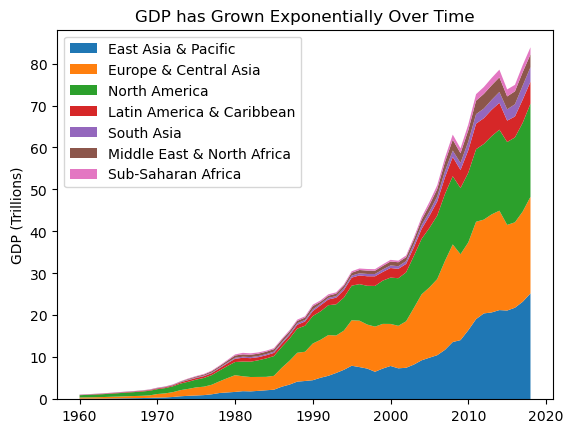

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns


# Create a stacked area chart showing the growth of GDP over time, with each stack representing a geographic region. 
#  the largest regions by GDP in 2018 are on bottom, with smaller regions on top.

fig, ax = plt.subplots()

ax.stackplot(
    gdp_pivot.index,
    [gdp_pivot[region] / 1_000_000_000_000 for region in gdp_pivot.iloc[-1].sort_values(ascending=False).index ],
    labels = gdp_pivot.iloc[-1].sort_values(ascending=False).index
)

ax.legend(loc="upper left")
ax.set_title("GDP has Grown Exponentially Over Time")
ax.set_ylabel("GDP (Trillions)")

Text(0, 0.5, 'Population (Billions)')

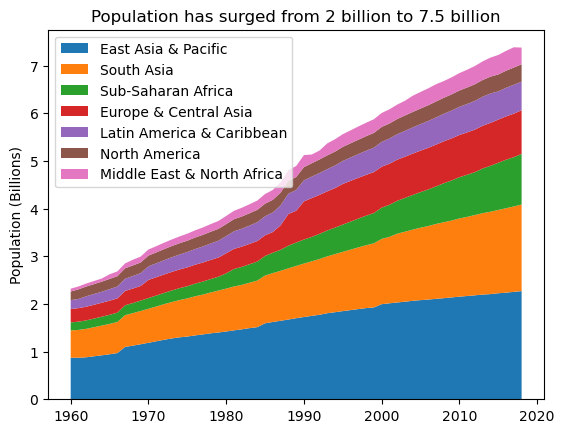

In [17]:
# Create a stacked area chart showing the growth of population over time, with each stack representing a geographic region. O
# sort from largest to smallest as of 2018.
fig, ax = plt.subplots()

ax.stackplot(
    pop_pivot.index,
    [pop_pivot[region] / 1000 for region in pop_pivot.iloc[-1].sort_values(ascending=False).index ],
    labels = pop_pivot.iloc[-1].sort_values(ascending=False).index
)

ax.legend(loc="upper left")
ax.set_title("Population has surged from 2 billion to 7.5 billion")
ax.set_ylabel("Population (Billions)")


In [18]:
# our population growth is somewhat linear, however, the gdp growth is exponential.

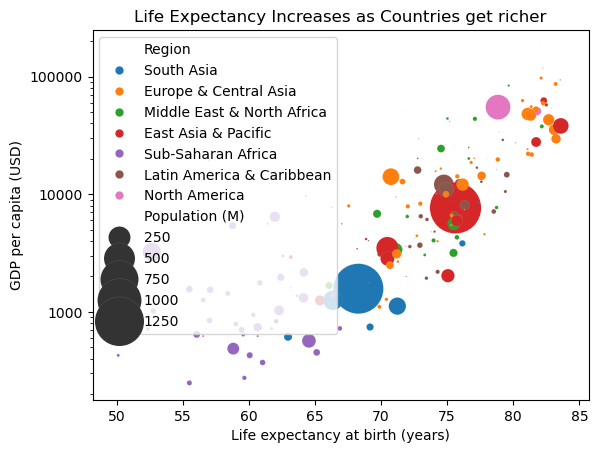

In [19]:
# Create a bubble chart with life expectancy for each country in the x-axis, and GDP per capita in the y-axis. 
# Make the y-axis a log scale. Size the bubbles by the population of each country. 
# Color the bubbles by region using the same colors for regions as the above charts.

import matplotlib.ticker as mticker

fig, ax = plt.subplots()

minsize = min(wb_hdi_2014["Population (M)"])
maxsize = max(wb_hdi_2014["Population (M)"])

sns.scatterplot(
    data=wb_hdi_2014,
    x="Life expectancy at birth (years)",
    y="GDP per capita (USD)",
    size="Population (M)",
    sizes = (minsize, maxsize),
    hue="Region",

    ax=ax
).set(title="Life Expectancy Increases as Countries get richer", yscale="log")

ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

In [20]:
# it shows that GDP and life expectancy has a strong relationship

<Axes: title={'center': 'HDI by Region'}, xlabel='Region', ylabel='Human Development Index HDI'>

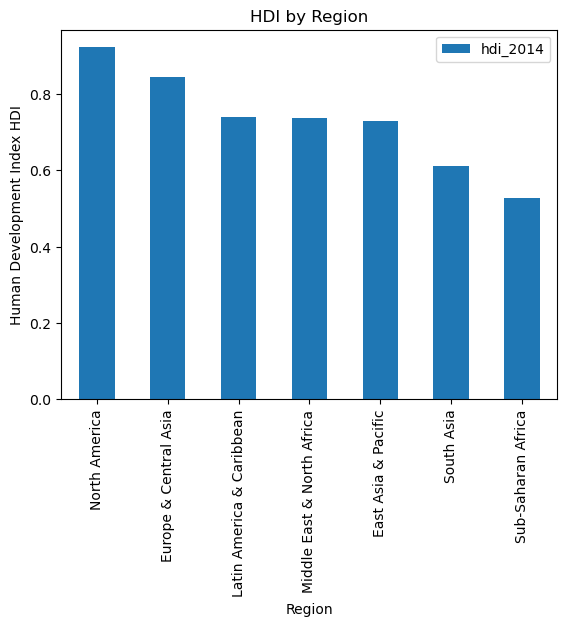

In [21]:
# Create a bar chart of average HDI by region. The colors match those assigned in the above charts.

wb_hdi_by_region.plot.bar(title="HDI by Region", ylabel="Human Development Index HDI")

[Text(0.5, 1.0, 'Electricity Drives Development')]

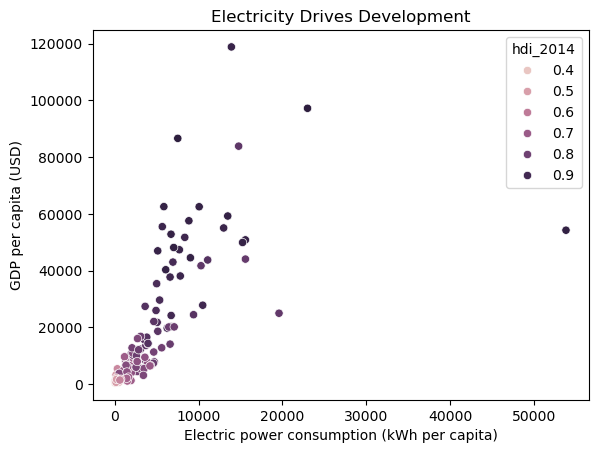

In [22]:
# create a scatterplot of with power consumption in the x-axis and GDP per capita in the y-axis. 
# The dots for each country colored by hdi. 


sns.scatterplot(
    data=wb_hdi_2014,
    x="Electric power consumption (kWh per capita)",
    y="GDP per capita (USD)",
    hue='hdi_2014'

).set(title="Electricity Drives Development")



It looks like we have outlier which electric consumption is too high. So, we need to remove it.

[Text(0.5, 1.0, 'Electricity Drives Development')]

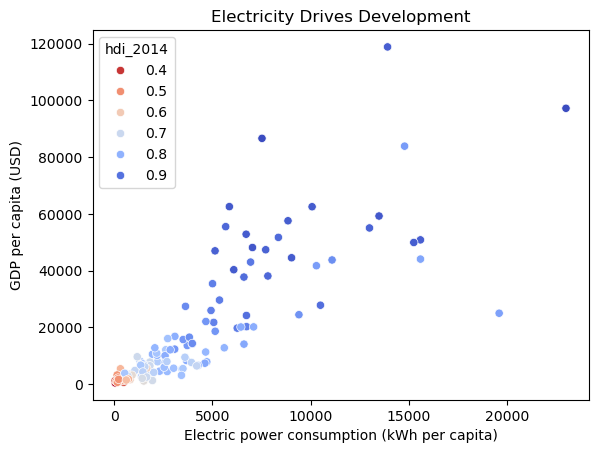

In [23]:
# Remove any outliers (e.g. Iceland).

sns.scatterplot(
    data=wb_hdi_2014.query("Country != 'Iceland'"),
    x="Electric power consumption (kWh per capita)",
    y="GDP per capita (USD)",
    hue='hdi_2014',
    palette="coolwarm_r"
    
).set(title="Electricity Drives Development")


### Create a Report

In [24]:
# Assemble the visualizations into a single figure, using matplotlib's Grid Mesh functionality. '
# 'There will be three "rows" of visuals. In row 1, area charts, in row 2 bubble chart, and in row 3, the bar chart and scatterplot side by side at the bottom.
# Add an overall figure title and a descriptive text in each "row" to add context for the reader.

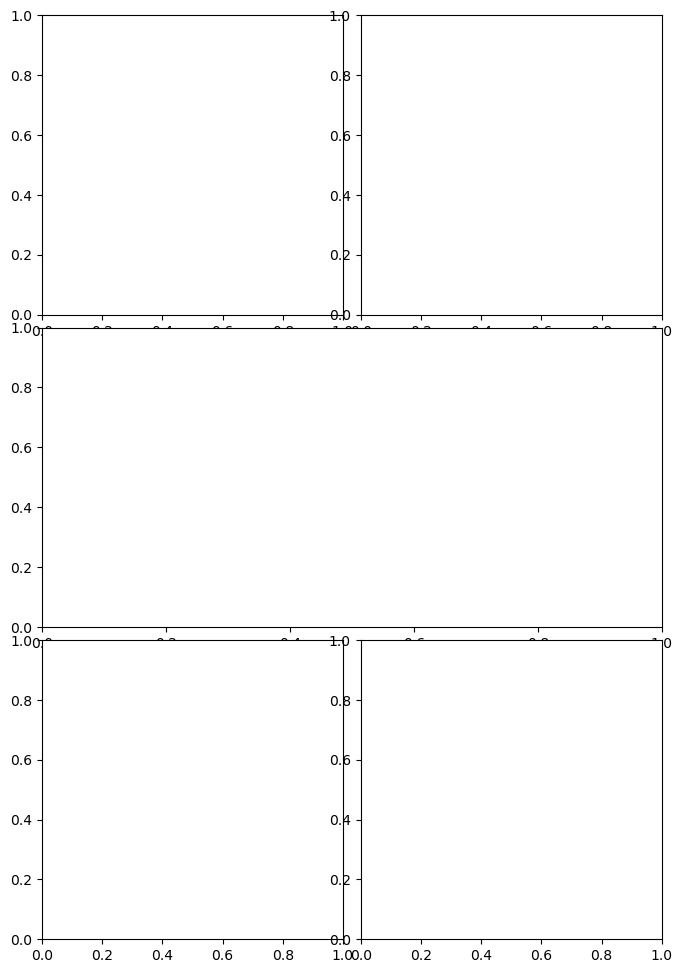

In [25]:
import matplotlib.gridspec as gridspec 

#  make the basic layout
fig = plt.figure(figsize=(8, 12))

gs = gridspec.GridSpec(nrows=12, ncols=6)

## add title

ax1 = fig.add_subplot(gs[0:4, 0:3])
ax2 = fig.add_subplot(gs[0:4, 3:6])
ax3 = fig.add_subplot(gs[4:8, :])
ax4 = fig.add_subplot(gs[8:12, 0:3])
ax5 = fig.add_subplot(gs[8:12, 3:6])



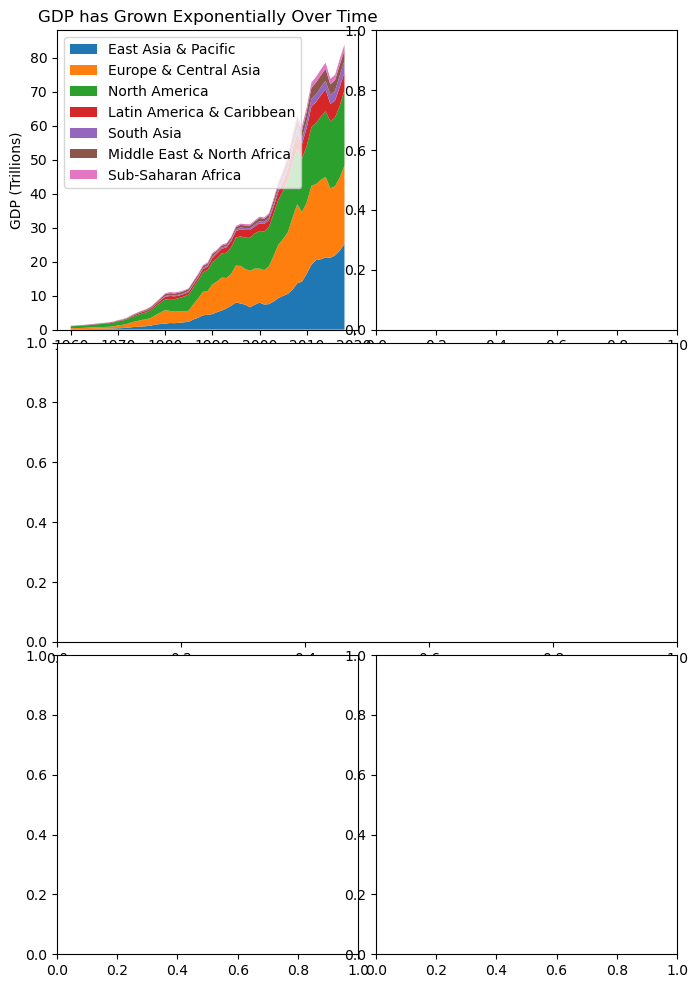

In [26]:
# start popluating figueres with codes from above figures

import matplotlib.gridspec as gridspec 

#  make the basic layout
fig = plt.figure(figsize=(8, 12))

gs = gridspec.GridSpec(nrows=12, ncols=6)

# add fig1 

## add title

ax1 = fig.add_subplot(gs[0:4, 0:3])

ax1.stackplot(
    gdp_pivot.index,
    [gdp_pivot[region] / 1_000_000_000_000 for region in gdp_pivot.iloc[-1].sort_values(ascending=False).index ],
    labels = gdp_pivot.iloc[-1].sort_values(ascending=False).index
)

ax1.legend(loc="upper left")
ax1.set_title("GDP has Grown Exponentially Over Time")
ax1.set_ylabel("GDP (Trillions)")

ax2 = fig.add_subplot(gs[0:4, 3:6])
ax3 = fig.add_subplot(gs[4:8, :])
ax4 = fig.add_subplot(gs[8:12, 0:3])
ax5 = fig.add_subplot(gs[8:12, 3:6])




In [27]:
# populate the rest of the figures

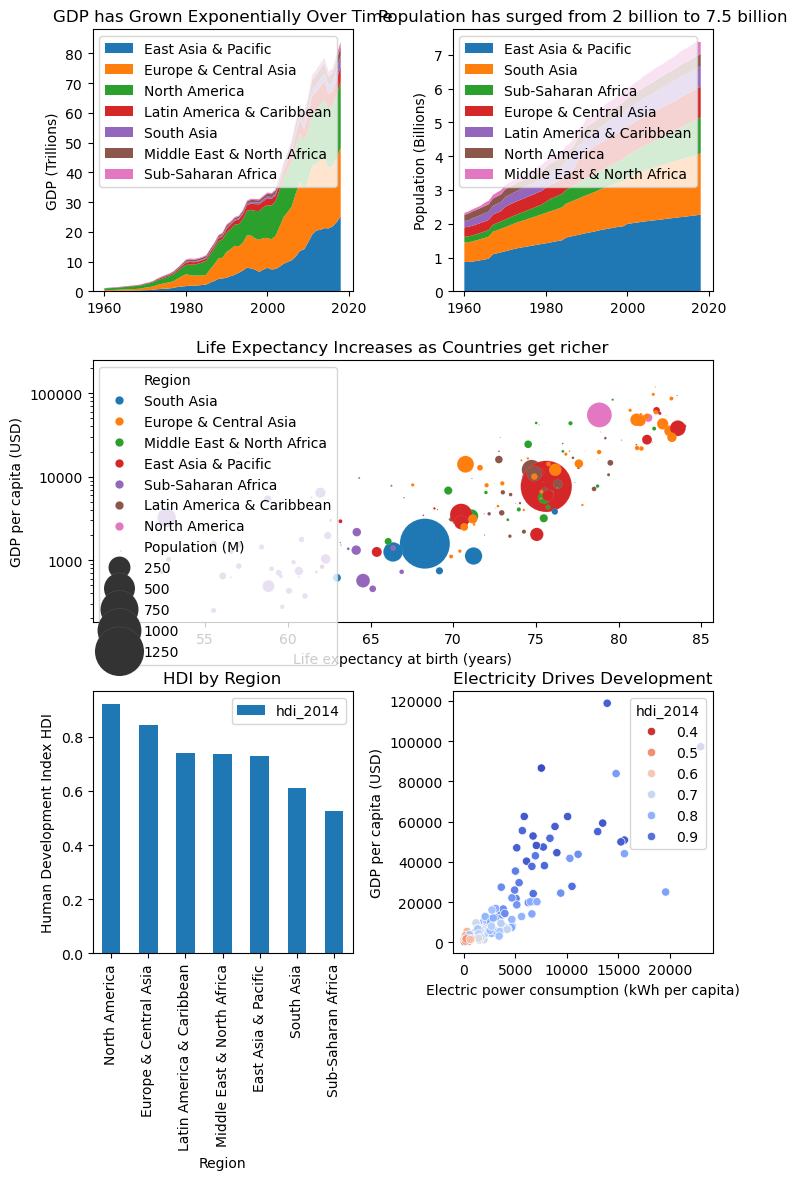

In [28]:
import matplotlib.gridspec as gridspec 

#  make the basic layout
fig = plt.figure(figsize=(8, 12))

gs = gridspec.GridSpec(nrows=12, ncols=6)

## add title

ax1 = fig.add_subplot(gs[0:4, 0:3])

ax1.stackplot(
    gdp_pivot.index,
    [gdp_pivot[region] / 1_000_000_000_000 for region in gdp_pivot.iloc[-1].sort_values(ascending=False).index ],
    labels = gdp_pivot.iloc[-1].sort_values(ascending=False).index
)

ax1.legend(loc="upper left")
ax1.set_title("GDP has Grown Exponentially Over Time")
ax1.set_ylabel("GDP (Trillions)")

# add ax2 

ax2 = fig.add_subplot(gs[0:4, 3:6])

ax2.stackplot(
    pop_pivot.index,
    [pop_pivot[region] / 1000 for region in pop_pivot.iloc[-1].sort_values(ascending=False).index ],
    labels = pop_pivot.iloc[-1].sort_values(ascending=False).index
)

ax2.legend(loc="upper left")
ax2.set_title("Population has surged from 2 billion to 7.5 billion")
ax2.set_ylabel("Population (Billions)")

# add ax3

ax3 = fig.add_subplot(gs[4:8, :])

minsize = min(wb_hdi_2014["Population (M)"])
maxsize = max(wb_hdi_2014["Population (M)"])

sns.scatterplot(
    data=wb_hdi_2014,
    x="Life expectancy at birth (years)",
    y="GDP per capita (USD)",
    size="Population (M)",
    sizes = (minsize, maxsize),
    hue="Region",

    ax=ax3
).set(title="Life Expectancy Increases as Countries get richer", yscale="log")

ax3.yaxis.set_major_formatter(mticker.ScalarFormatter())

# add ax4 

ax4 = fig.add_subplot(gs[8:12, 0:3])

wb_hdi_by_region.plot.bar(title="HDI by Region", ylabel="Human Development Index HDI", ax=ax4 )

# add ax5

ax5 = fig.add_subplot(gs[8:12, 3:6])

ax5 = sns.scatterplot(
    data=wb_hdi_2014.query("Country != 'Iceland'"),
    x="Electric power consumption (kWh per capita)",
    y="GDP per capita (USD)",
    hue='hdi_2014',
    palette="coolwarm_r"
    
).set(title="Electricity Drives Development")

fig.subplots_adjust(wspace=5, hspace=5)

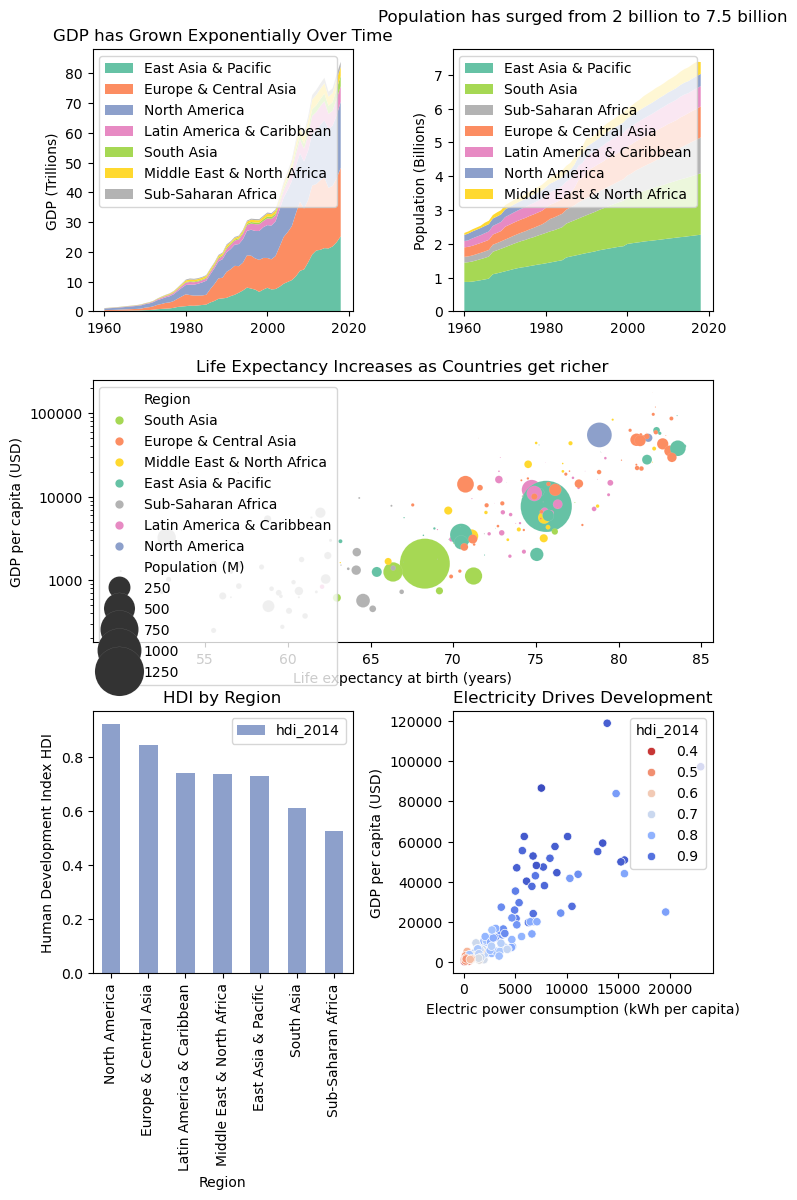

In [57]:
# adjust coloring to ensure consistency across all charts

stack1_list = ['#66C2A5', '#fC8D62', '#8DA0CB', '#E78AC3', '#A6D854', '#FFD92F', '#B3B3B3'] 
stack2_list = ['#66C2A5', '#A6D854', '#B3B3B3', '#fC8D62', '#E78AC3', '#8DA0CB', '#FFD92F'] 
bar_list = ['#8DA0CB', '#fC8D62', '#E78AC3', '#FFD92F', '#66C2A5', '#A6D854', '#B3B3B3'] 
bubble_list = ['#A6D854', '#fC8D62', '#FFD92F', '#66C2A5', '#B3B3B3', '#E78AC3', '#8DA0CB']


#  make the basic layout
fig = plt.figure(figsize=(8, 12))

gs = gridspec.GridSpec(nrows=12, ncols=6)

## add title

ax1 = fig.add_subplot(gs[0:4, 0:3])

ax1.stackplot(
    gdp_pivot.index,
    [gdp_pivot[region] / 1_000_000_000_000 for region in gdp_pivot.iloc[-1].sort_values(ascending=False).index ],
    labels = gdp_pivot.iloc[-1].sort_values(ascending=False).index,
    colors=stack1_list
)

ax1.legend(loc="upper left")
ax1.set_title("GDP has Grown Exponentially Over Time")
ax1.set_ylabel("GDP (Trillions)")

ax2 = fig.add_subplot(gs[0:4, 3:6])

ax2.stackplot(
    pop_pivot.index,
    [pop_pivot[region] / 1000 for region in pop_pivot.iloc[-1].sort_values(ascending=False).index ],
    labels = pop_pivot.iloc[-1].sort_values(ascending=False).index,
    colors=stack2_list
)

ax2.legend(loc="upper left")
ax2.set_title("Population has surged from 2 billion to 7.5 billion", pad=20)
ax2.set_ylabel("Population (Billions)")

ax3 = fig.add_subplot(gs[4:8, :])

minsize = min(wb_hdi_2014["Population (M)"])
maxsize = max(wb_hdi_2014["Population (M)"])

sns.scatterplot(
    data=wb_hdi_2014,
    x="Life expectancy at birth (years)",
    y="GDP per capita (USD)",
    size="Population (M)",
    sizes = (minsize, maxsize),
    hue="Region",
    palette=bubble_list,
    ax=ax3
).set(title="Life Expectancy Increases as Countries get richer", yscale="log")

ax3.yaxis.set_major_formatter(mticker.ScalarFormatter())

ax4 = fig.add_subplot(gs[8:12, 0:3])

wb_hdi_by_region.plot.bar(
    ax=ax4,
    title="HDI by Region",
    ylabel="Human Development Index HDI",
    color=bar_list
)

ax5 = fig.add_subplot(gs[8:12, 3:6])

sns.scatterplot(
    data=wb_hdi_2014.query("Country != 'Iceland'"),
    x="Electric power consumption (kWh per capita)",
    y="GDP per capita (USD)",
    hue='hdi_2014',
    palette="coolwarm_r",
    ax=ax5
    
).set(title="Electricity Drives Development")

fig.subplots_adjust(wspace=5, hspace=5)


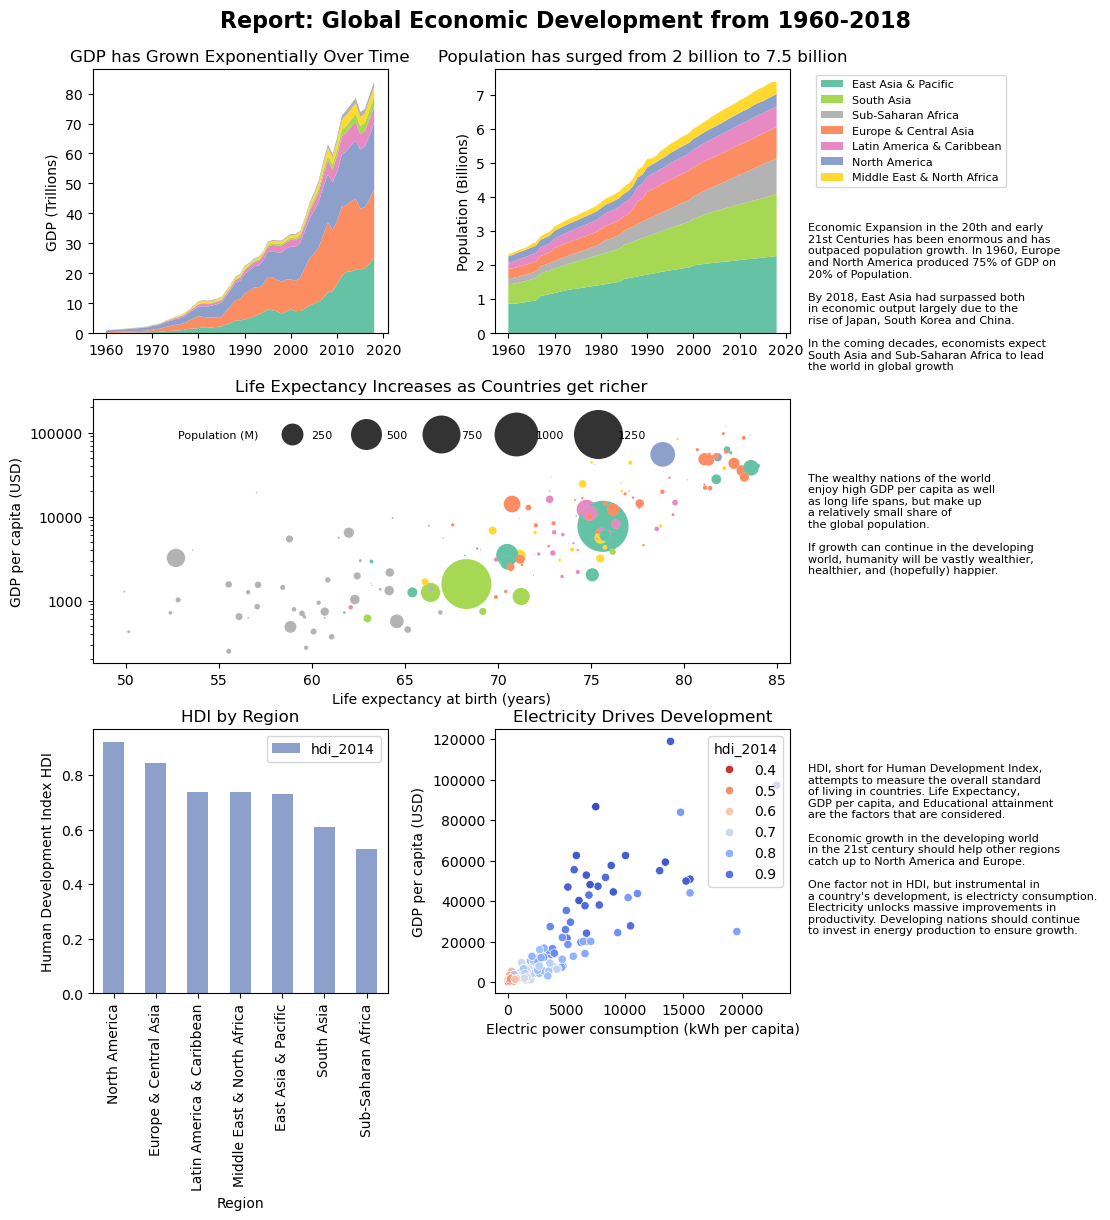

In [73]:
import matplotlib.pyplot as plt 
import seaborn as sns

# adjusting legends to outside of the chart : ax2.legend(bbox_to_anchor=(1.75, 1), fontsize=8)

fig = plt.figure(figsize=(9, 12))

gs = gridspec.GridSpec(nrows=12, ncols=6)


stack1_list = ['#66C2A5', '#fC8D62', '#8DA0CB', '#E78AC3', '#A6D854', '#FFD92F', '#B3B3B3'] 
stack2_list = ['#66C2A5', '#A6D854', '#B3B3B3', '#fC8D62', '#E78AC3', '#8DA0CB', '#FFD92F'] 
bar_list = ['#8DA0CB', '#fC8D62', '#E78AC3', '#FFD92F', '#66C2A5', '#A6D854', '#B3B3B3'] 
bubble_list = ['#A6D854', '#fC8D62', '#FFD92F', '#66C2A5', '#B3B3B3', '#E78AC3', '#8DA0CB']

fig.suptitle(
    "Report: Global Economic Development from 1960-2018",
    fontsize=16,
    fontweight="bold",
    x=.65,
    y=.93
)



ax1 = fig.add_subplot(gs[0:4, 0:3])

ax1.stackplot(
    gdp_pivot.index,
    [gdp_pivot[region] / 1_000_000_000_000 for region in gdp_pivot.iloc[-1].sort_values(ascending=False).index ],
    labels = gdp_pivot.iloc[-1].sort_values(ascending=False).index,
    colors=stack1_list
)


ax1.set_title("GDP has Grown Exponentially Over Time")
ax1.set_ylabel("GDP (Trillions)")


fig.text(.92, .62,
'''
Economic Expansion in the 20th and early 
21st Centuries has been enormous and has 
outpaced population growth. In 1960, Europe 
and North America produced 75% of GDP on 
20% of Population.

By 2018, East Asia had surpassed both 
in economic output largely due to the 
rise of Japan, South Korea and China.

In the coming decades, economists expect 
South Asia and Sub-Saharan Africa to lead 
the world in global growth
'''
, fontsize=8)



ax2 = fig.add_subplot(gs[0:4, 3:6])

ax2.stackplot(
    pop_pivot.index,
    [pop_pivot[region] / 1000 for region in pop_pivot.iloc[-1].sort_values(ascending=False).index ],
    labels = pop_pivot.iloc[-1].sort_values(ascending=False).index,
    colors=stack2_list
)

ax2.set_title("Population has surged from 2 billion to 7.5 billion")
ax2.set_ylabel("Population (Billions)")
ax2.legend(bbox_to_anchor=(1.75, 1), fontsize=8)

ax3 = fig.add_subplot(gs[4:8, :])

minsize = min(wb_hdi_2014["Population (M)"])
maxsize = max(wb_hdi_2014["Population (M)"])

sns.scatterplot(
    data=wb_hdi_2014,
    x="Life expectancy at birth (years)",
    y="GDP per capita (USD)",
    size="Population (M)",
    sizes = (minsize, maxsize),
    hue="Region",
    palette=bubble_list,
    ax=ax3
).set(title="Life Expectancy Increases as Countries get richer", yscale="log")

ax3.yaxis.set_major_formatter(mticker.ScalarFormatter())

handles, labels = ax3.get_legend_handles_labels()
entries_to_skip = len(wb_hdi_2014["Region"].unique()) + 1

# Loop through only the scatter plot handles
for h in handles[1:]:  # Skip if needed based on entries_to_skip
    if isinstance(h, plt.Line2D):
        continue  # Skip line handles if any
        
    if hasattr(h, "get_sizes") and hasattr(h, "set_sizes"):
        sizes = [s / 1.5 for s in h.get_sizes()]
        h.set_sizes(sizes)

ax3.legend(handles[entries_to_skip:],
           labels[entries_to_skip:],
           bbox_to_anchor=(.8, .9),
           borderaxespad=0.,
           frameon=False,
           ncol=6,
           fontsize=8)


fig.text(.92, .45,
'''     
The wealthy nations of the world 
enjoy high GDP per capita as well 
as long life spans, but make up 
a relatively small share of 
the global population.

If growth can continue in the developing 
world, humanity will be vastly wealthier,
healthier, and (hopefully) happier.
'''
, fontsize=8)


ax4 = fig.add_subplot(gs[8:12, 0:3])

wb_hdi_by_region.plot(
    kind='bar',
    ax=ax4,
    color=bar_list,
    title="HDI by Region",
    ylabel="Human Development Index HDI"
    
)

ax5 = fig.add_subplot(gs[8:12, 3:6])

sns.scatterplot(
    data=wb_hdi_2014.query("Country != 'Iceland'"),
    x="Electric power consumption (kWh per capita)",
    y="GDP per capita (USD)",
    hue='hdi_2014',
    palette="coolwarm_r",
    ax=ax5
    
).set(title="Electricity Drives Development")


fig.text(.92, .15,
'''
HDI, short for Human Development Index, 
attempts to measure the overall standard 
of living in countries. Life Expectancy, 
GDP per capita, and Educational attainment 
are the factors that are considered.

Economic growth in the developing world 
in the 21st century should help other regions 
catch up to North America and Europe.

One factor not in HDI, but instrumental in 
a country's development, is electricty consumption. 
Electricity unlocks massive improvements in 
productivity. Developing nations should continue 
to invest in energy production to ensure growth.
'''
, fontsize=8)



fig.subplots_adjust(wspace=4, hspace=4)
